In [9]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
from IPython.display import HTML

In [2]:
def rho_red_light(nx, rho_max, rho_in):
    
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)] = rho_in
    return rho

def computeF(u_max, rho_max, rho):
    
    return u_max*rho*(1-rho/rho_max)

In [3]:
nx = 100
nt = 30
dx = 4.0/nx

rho_in = 5.
rho_max = 10.

V_max = 1.

# x_i now is the center of the i-th cell
x = numpy.linspace(0+0.5*dx, 4-0.5*dx, nx)


rho = rho_red_light(nx, rho_max, rho_in)

In [4]:
def animate(data):
    x = numpy.linspace(0+0.5*dx, 4-0.5*dx, nx)
    y = data
    line.set_data(x,y)
    return line,

In [5]:
def godunov(rho, nt, dt, dx, rho_max, V_max):

    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[:,:] = rho.copy()              
    
    #setup some temporary arrays
    rho_plus = numpy.zeros_like(rho)
    rho_minus = numpy.zeros_like(rho)
    flux = numpy.zeros_like(rho)
  
    for t in range(1,nt):
        
        rho_plus[:-1] = rho[1:] # Can't do i+1/2 indices, so cell boundary
        rho_minus = rho.copy() # arrays at index i are at location i+1/2
        flux = 0.5 * (computeF(V_max, rho_max, rho_minus) + 
                      computeF(V_max, rho_max, rho_plus) + 
                      dx / dt * (rho_minus - rho_plus))
        rho_n[t,1:-1] = rho[1:-1] + dt/dx*(flux[:-2]-flux[1:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [6]:
sigma = 1.0
dt = sigma*dx/V_max

rho = rho_red_light(nx, rho_max, rho_in)      #make sure that u is set to our expected initial conditions
rho_n = godunov(rho, nt, dt, dx, rho_max, V_max)

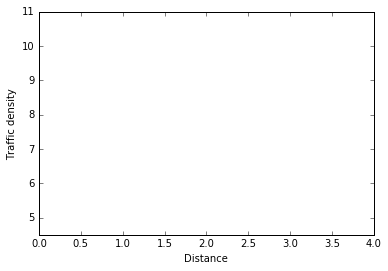

In [10]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [11]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())